<a href="https://colab.research.google.com/github/SheikSadi/SAM-LSTM-RESNET/blob/master/Smart_Cropping_Images_based_on_Saliency_Mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sam-lstm==1.0.1

## Upload some samples for generating saliency maps and bounding boxes

In [ ]:
# Upload some samples
import os
from google.colab import files

samples_path = os.path.abspath("/content/samples/")
if not os.path.exists(samples_path):
    os.mkdir(samples_path)
os.chdir(samples_path)
uploaded = files.upload()
os.chdir("/content/")

## Now start generating maps and creating boxes with just two lines of code!

In [3]:
from sam_lstm import SalMap

SalMap.auto()

561452496/561452496 [==============================] - 10s 0us/step
Predicting saliency maps for samples
4/4 [==============================] - 10s 111ms/step
Cropped and boxed puzzle.jpg successfully
Cropped and boxed marnie-house.jpg successfully
Cropped and boxed garden-of-words.jpg successfully
Cropped and boxed get lucky.jpg successfully


### Visualize the Results

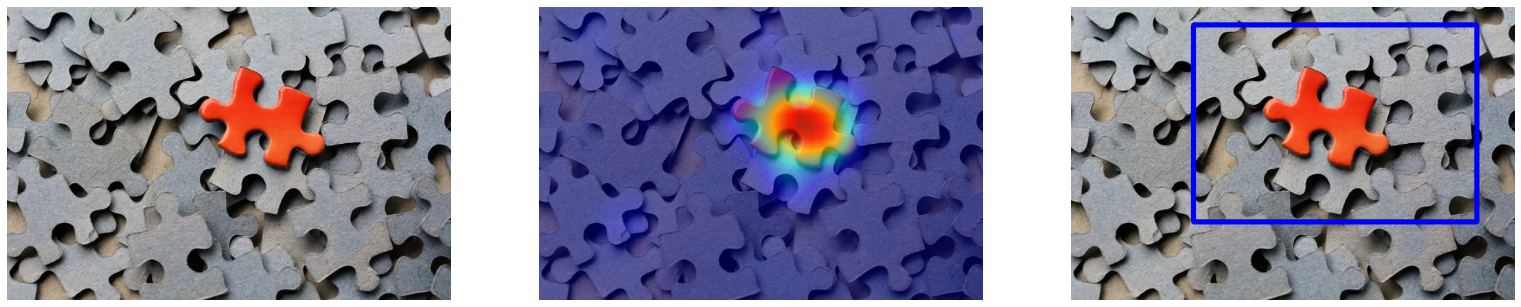

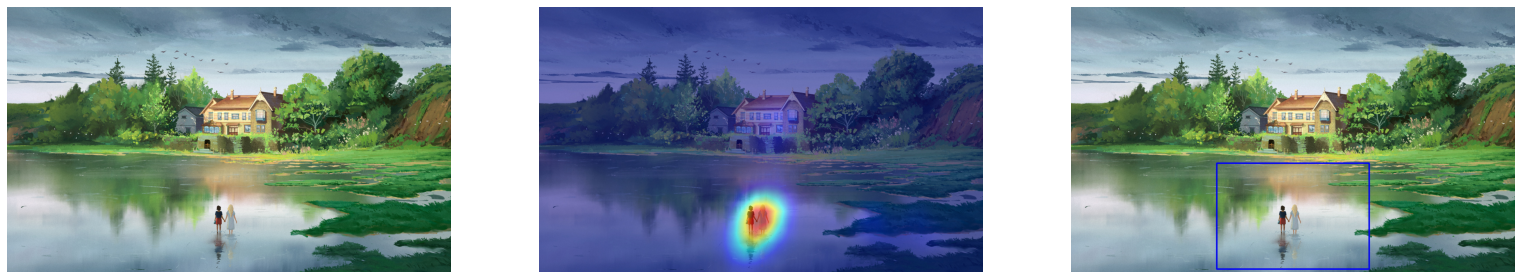

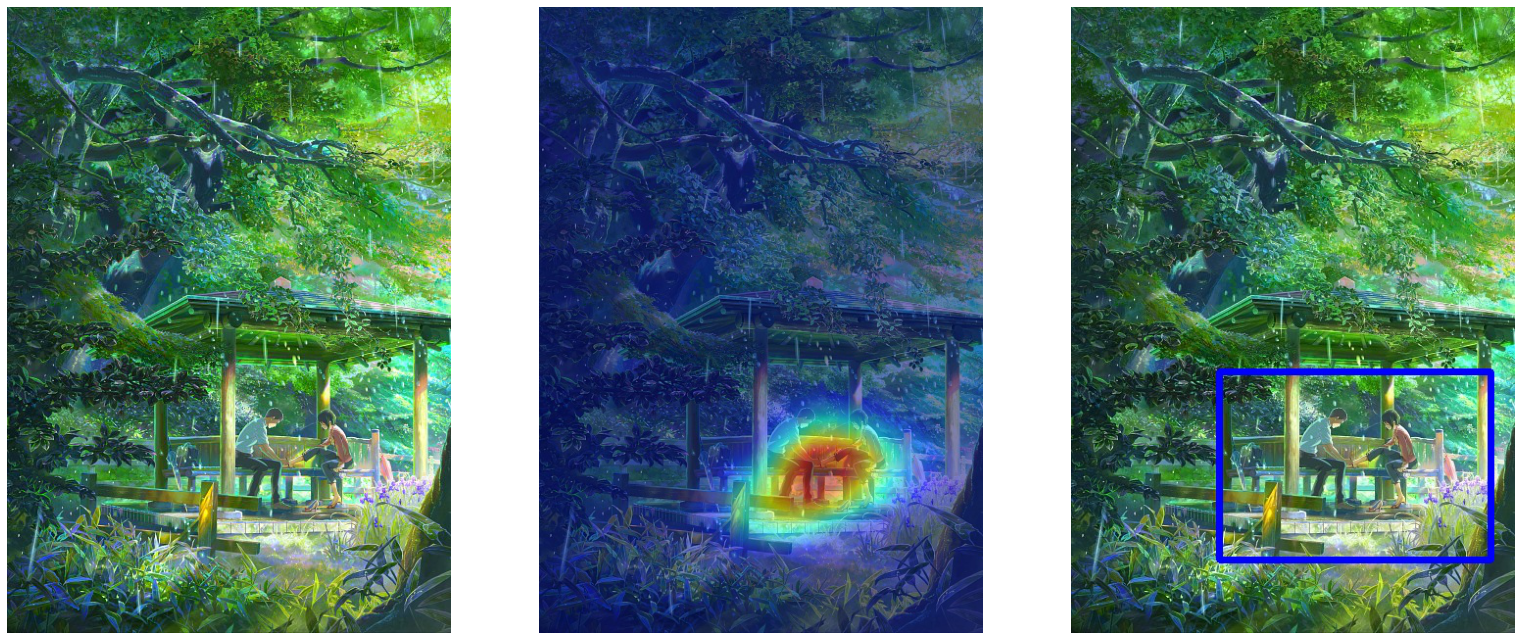

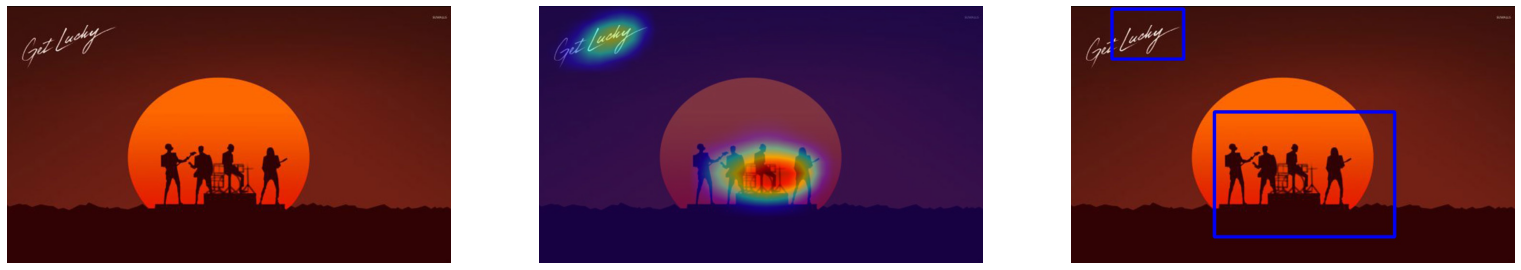

In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for fname in os.listdir("samples"):
    org = mpimg.imread(f"samples/{fname}")
    cmap = mpimg.imread(f"cmaps/{fname}")
    box = mpimg.imread(f"boxes/{fname}")

    h, w = org.shape[0], org.shape[1]
    scale = 9 / w

    fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(3 * w * scale, h * scale))
    ax0.imshow(org); ax1.imshow(cmap); ax2.imshow(box);
    ax0.axis("off"); ax1.axis("off"); ax2.axis("off");

### Train the weights and save them in your Google Drive to load them later with `s.load_weights(weights_dir)` method. More on this later.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

if not os.path.exists("/content/drive/MyDrive/Checkpoints/"):
    os.mkdir("/content/drive/MyDrive/Checkpoints/")

s = SalMap()
s.compile()
s.load_weights()
s.train("dataset", "/content/drive/MyDrive/Checkpoints/", steps_per_epoch=1000)

## Make predictions with the recently trained weights (saved on Google Drive)

In [ ]:
s = SalMap()
s.compile()
s.load_weights("/content/drive/MyDrive/Checkpoints/sam-resnet-salicon.h5")
s.predict_maps()
s.box_and_crop()

In [ ]:
fname = "garden-of-words.jpg"

org = mpimg.imread(f"samples/{fname}")
map = mpimg.imread(f"maps/{fname}")
cmap = mpimg.imread(f"cmaps/{fname}")
box = mpimg.imread(f"boxes/{fname}")
crop = mpimg.imread(f"crops/{fname}")

h, w = org.shape[0], org.shape[1]
scale = 9 / w

fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize=(5 * w * scale, h * scale))
ax0.imshow(org); ax1.imshow(map); ax2.imshow(cmap); ax3.imshow(box); ax4.imshow(crop);
ax0.axis("off"); ax1.axis("off"); ax2.axis("off"); ax3.axis("off"); ax4.axis("off");

# Thank You!